In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

#needed to import utils.py
sys.path.append('../') 

import utils
import numpy as np
import pandas as pd

%matplotlib inline  

---
### Read patient data 

In [2]:
#set the data directory
data_dir = os.path.abspath('../03_preprocessed_data/')

#set the name of CSV file
data_file = f'{data_dir}/_patient.csv'

#read data and show some info
df = utils.read_csv(data_file)

print(df.shape[0])

df.head()

5230


,subject_id,Sex,Qty_Measurements_ALSFRS,Qty_Measurements_VITALSIGNS,Qty_Measurements_FVC,Qty_Measurements_SVC,Qty_Measurements_LABS,Qty_Measurements_HANDGRIPSTRENGTH,Qty_Measurements_MUSCLESTRENGTH,Qty_Measurements,...,Age_Range_at_Onset_Coded,Event_Dead,Event_Dead_Time_from_Onset,Group_Survival,Group_Survival_Coded,Riluzole,Riluzole_Time_from_Onset,Height_in_Meters,Qty_Measurements_BMI,El_Escorial
0,329,Female,12.0,13.0,8.0,0.0,465.0,0.0,0.0,498.0,...,0.0,False,65.0,Non-Short,0.0,False,56,1.58,10.0,NaN
1,348,Female,15.0,10.0,0.0,9.0,820.0,0.0,0.0,854.0,...,2.0,False,29.0,Non-Short,0.0,True,16,1.63,8.0,Probable Laboratory Supported
2,533,Female,6.0,10.0,2.0,6.0,126.0,0.0,0.0,150.0,...,3.0,False,46.0,Non-Short,0.0,False,33,1.51,7.0,Probable Laboratory Supported
3,586,Male,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,3.0,False,23.0,NaN,NaN,False,23,1.71,1.0,Probable Laboratory Supported
4,708,Male,11.0,12.0,7.0,0.0,404.0,0.0,0.0,434.0,...,1.0,True,43.0,Non-Short,0.0,False,35,1.84,8.0,NaN


## Check missing value ratio foe each column

In [3]:
cols = [
    'Qty_Measurements_ALSFRS',
    'Qty_Measurements_FVC',
    'Qty_Measurements_SVC',
    'Qty_Measurements_BMI',

#     'subject_id',
#     'Sex',

#     'Qty_Measurements_VITALSIGNS',
#     'Qty_Measurements_LABS',
#     'Qty_Measurements_HANDGRIPSTRENGTH',
#     'Qty_Measurements_MUSCLESTRENGTH',
#     'Qty_Measurements',

#     'Symptoms_Onset_Delta',
#     'Diagnosis_Delta',
    'Site_Onset',
    'Diagnosis_Delay',
#     'Diagnosis_Delay_Str',
#     'Diagnosis_Delay_Coded',
    'Age_at_Onset',
#     'Age_Range_at_Onset',
#     'Age_Range_at_Onset_Coded',
#     'Event_Dead',
#     'Event_Dead_Time_from_Onset',
    'Group_Survival',
#     'Group_Survival_Coded',
    'Riluzole',
#     'Riluzole_Time_from_Onset',
#     'Height_in_Meters',
    'El_Escorial',
]


tot_rows = df.shape[0]
for col in cols:
    value_counts = df[col].value_counts(dropna=False)
    
    if col.startswith('Qty_'):
        tot_with_zero = value_counts.get(0.0)
    else:
        tot_with_zero = value_counts.get(np.NaN)
#         print()
#         print(value_counts)
#         print(col, tot_with_zero)
        
        
    if tot_with_zero is None:
        tot_with_zero = 0
    
    print(f'{col:>27}: {tot_with_zero:>4} ({(tot_with_zero/tot_rows*100):>2.0f}%) samples with missing values ')
    


    Qty_Measurements_ALSFRS:    0 ( 0%) samples with missing values 
       Qty_Measurements_FVC: 1665 (32%) samples with missing values 
       Qty_Measurements_SVC: 3422 (65%) samples with missing values 
       Qty_Measurements_BMI: 1912 (37%) samples with missing values 
                 Site_Onset:    0 ( 0%) samples with missing values 
            Diagnosis_Delay:    0 ( 0%) samples with missing values 
               Age_at_Onset:    0 ( 0%) samples with missing values 
             Group_Survival: 1435 (27%) samples with missing values 
                   Riluzole:    0 ( 0%) samples with missing values 
                El_Escorial: 1867 (36%) samples with missing values 


### Check columns missingness ratio

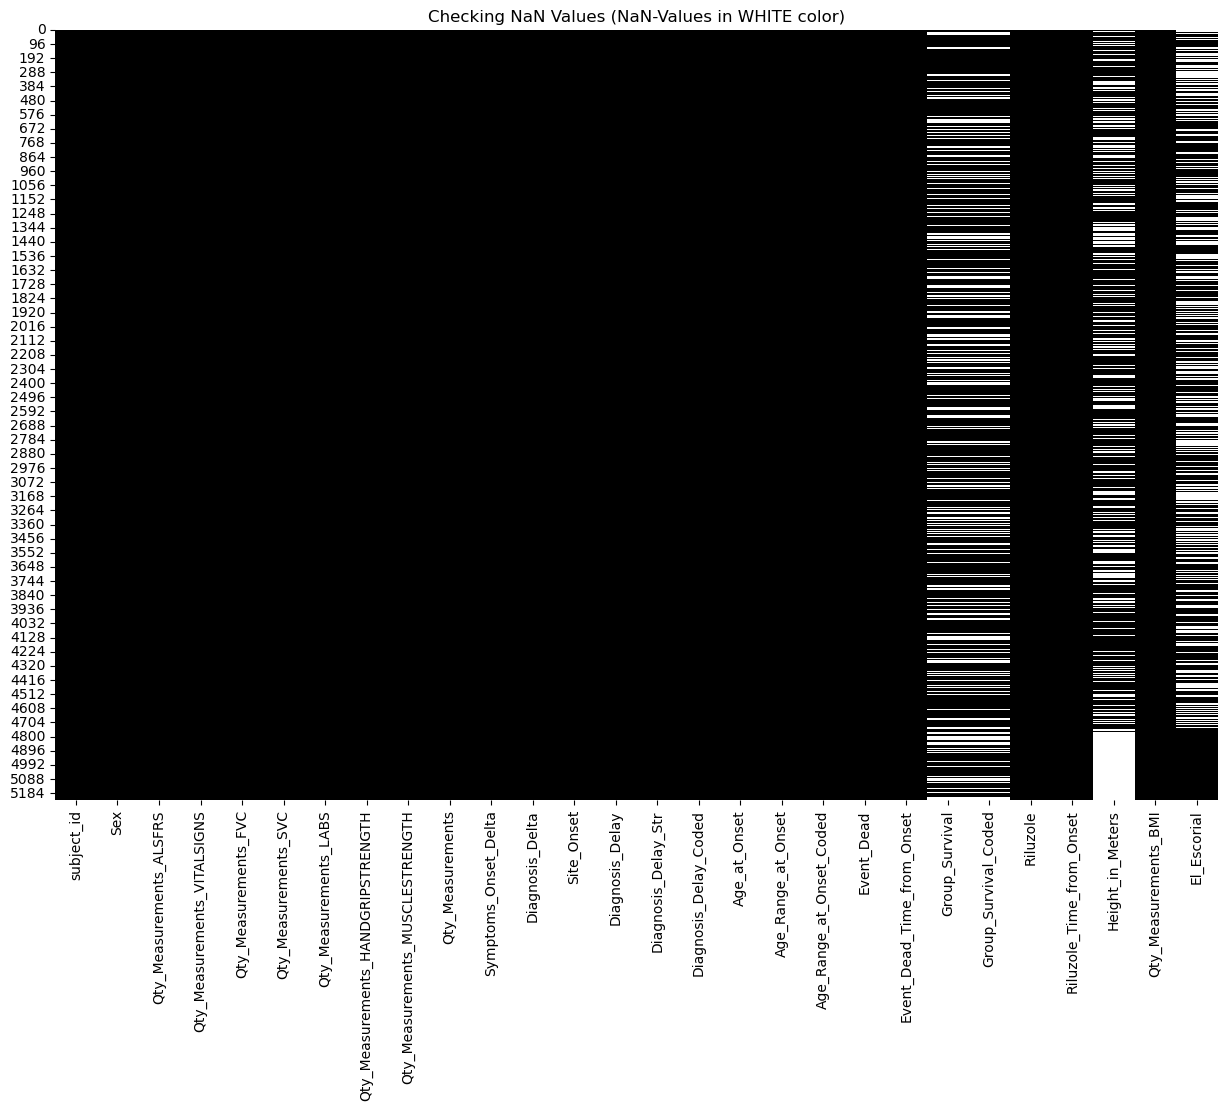

subject_id....................... =  5230 rows (100.0%)     0 with NaN (  0.0%) Uniques=  5230 
Sex.............................. =  5230 rows (100.0%)     0 with NaN (  0.0%) Uniques=     2 
Qty_Measurements_ALSFRS.......... =  5230 rows (100.0%)     0 with NaN (  0.0%) Uniques=    32 
Qty_Measurements_VITALSIGNS...... =  5230 rows (100.0%)     0 with NaN (  0.0%) Uniques=    55 
Qty_Measurements_FVC............. =  5230 rows (100.0%)     0 with NaN (  0.0%) Uniques=    20 
Qty_Measurements_SVC............. =  5230 rows (100.0%)     0 with NaN (  0.0%) Uniques=    17 
Qty_Measurements_LABS............ =  5230 rows (100.0%)     0 with NaN (  0.0%) Uniques=   953 
Qty_Measurements_HANDGRIPSTRENGTH =  5230 rows (100.0%)     0 with NaN (  0.0%) Uniques=    38 
Qty_Measurements_MUSCLESTRENGTH.. =  5230 rows (100.0%)     0 with NaN (  0.0%) Uniques=   293 
Qty_Measurements................. =  5230 rows (100.0%)     0 with NaN (  0.0%) Uniques=  1087 
Symptoms_Onset_Delta............. =  523

In [4]:
utils.plot_nan_values_heatmap(df, title='Checking NaN Values (NaN-Values in WHITE color)')
utils.show_columns_stats(df, df.columns)

### Plot HeatMap showing NaN values per column (White color means NaN values)

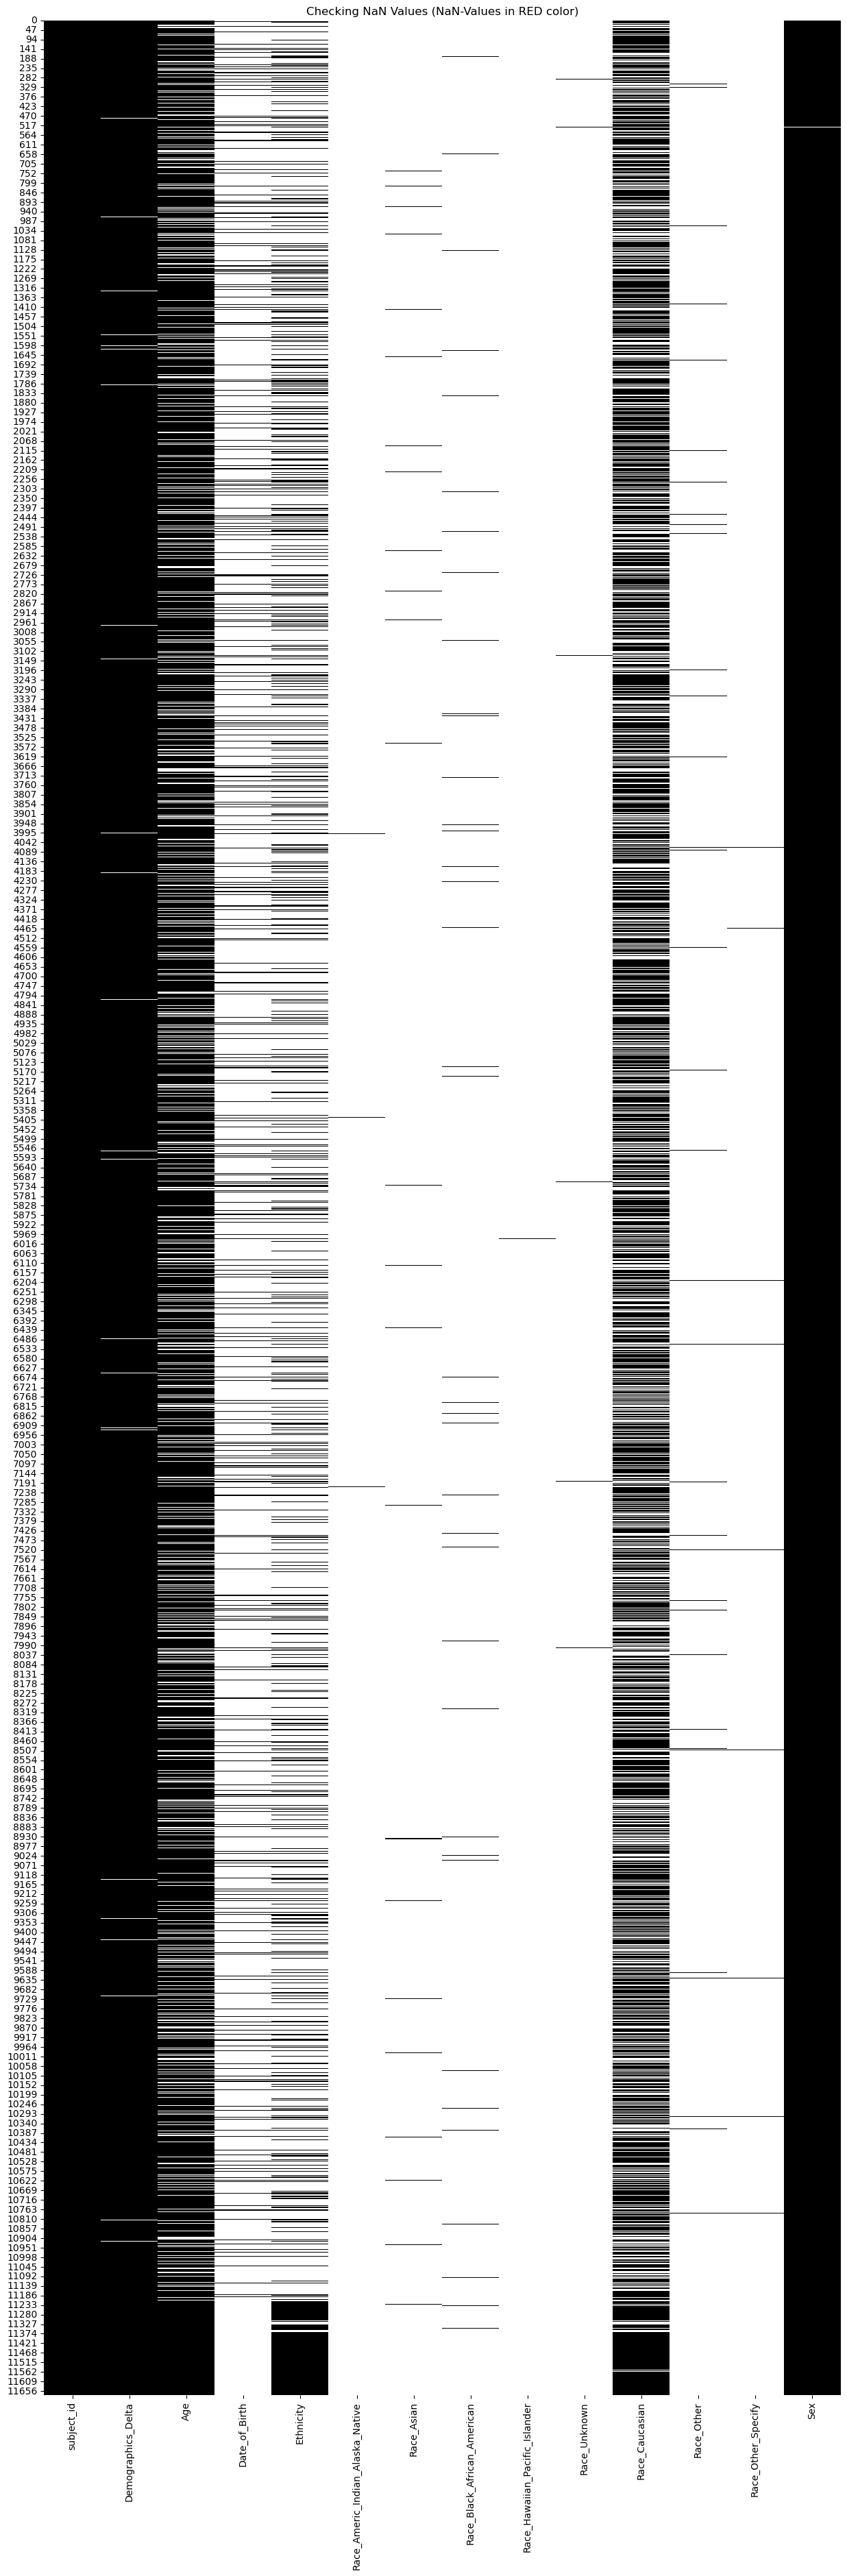

In [15]:
# plot HeatMap of NaN values for all columns
utils.plot_nan_values_heatmap(data=df, title='Checking NaN Values (NaN-Values in WHITE color)', 
                              cbar=False, figsize=[15, 45] )

----
----
----
## Remove rows with NaN in the AGE and SEX columns

In [20]:
# AGE column
to_delete = df.loc[(df.Age.isnull())]
df = utils.remove_rows(df=df, to_delete=to_delete)


# SEX column
to_delete = df.loc[(df.Sex.isnull())]
df = utils.remove_rows(df=df, to_delete=to_delete)

df


  - Previous=11675, To delete=2077, After=9598
  - Previous=9598, To delete=0, After=9598


,subject_id,Age,Sex
1,329,38.0,Female
2,348,52.0,Female
5,533,65.0,Female
6,586,63.0,Male
7,649,48.0,Female
...,...,...,...
11670,22564,63.0,Male
11671,160135,67.0,Female
11672,304192,59.0,Female
11673,820199,49.0,Male


----
----
----
## Save the pre-processed data to CSV file

In [29]:
# dir_dest = os.path.abspath('../03_preprocessed_data/')
# csv_dest = f'{dir_dest}/_patient.csv'
# utils.save_to_csv(df=df_to_save, csv_file=csv_dest)


7712 samples were saved
